# Tutorial 1: Introduction to Statistical Modelling and A/B Testing 

## Learning Objectives

After completing this week's worksheet and tutorial work, you will be able to:

1. Describe the goals of hypothesis testing, in particular difference in means tests related to A/B testing.
2. Give an example of a problem that requires A/B testing.
3. List methods used to test difference in means between two populations.
4. Interpret the results of hypothesis tests.
5. Explain the relation between type I and type II errors, power and sample size in 2-sample hypothesis testing.
6. Write a computer script to perform difference in means hypothesis testing and compute errors, power and p-values.

In [1]:
# Run this cell before continuing.
library(tidyverse)
library(infer)
library(broom)
library(cowplot)
library(binom)
source("tests_tutorial_01.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp



Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches




## 1. Analysis of an A/B Testing Paper

In Worksheet 1, we reviewed key concepts of hypothesis tests to test the difference between two population means and discussed their relation to A/B testing. In this tutorial, you will review concepts related to the difference between two proportions, also seen before in STAT 201.

In this exercise, we will work with the paper ["Improving Library User Experience with A/B Testing: Principles and Process"](https://quod.lib.umich.edu/w/weave/12535642.0001.101?view=text;rgn=main) by Young (2014). This paper presents a case study where A/B testing is applied with different webpage designs. The primary aim is to compare user interactions to determine which one statistically improves the navigation experience by increasing the homepage click-through rate. The experiment was conducted using the web analytics software Google Analytics and Crazy Egg. The data from the paper can be found [here](https://scholarworks.montana.edu/xmlui/handle/1/3507).

The setup was done on the **Interact** category in the Montana State University's library webpage (more information can be found in the section *Step 1* in the paper). The experimental treatments (as explained and shown in *Step 4* in the paper) are the following: **Interact** (the control treatment), **Connect**, **Learn**, **Help**, and **Services**. The response variable is what we call the **click-through rate**, i.e., ratio of users that click on a specific link to the total number of users who view the page (a proportion that goes from 0 to 1).

We have already processed the data for you. Firstly, we load the Crazy Egg data from the web.

In [2]:
click_through <- 
    read_csv("data/click_through.csv") %>% 
    select(webpage, adjusted_clicks, target_clicks)

head(click_through)

Rows: 5 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): webpage
dbl (4): clicks, home_page_clicks, adjusted_clicks, target_clicks

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


webpage,adjusted_clicks,target_clicks
<chr>,<dbl>,<dbl>
Interact,2423,42
Connect,1504,53
Learn,1569,21
Help,1595,38
Services,1299,45


**Question 1.0**
<br>{points: 1}

The `adjusted_clicks` in the data frame `click_through` are the total clicks we will use to compute the click-through rate by treatment, where `target_clicks` are what we could define as **“successes”**. Compute the corresponding click-through rate by row by dividing `target_clicks` over `adjusted_clicks`. Add it as a new column in the data frame called `click_rate`. Then, reorder the experimental treatments (i.e., factor levels) in descending order by click-through rate.

*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

In [3]:
# click_through <- 
#     ... %>% 
#     mutate(click_rate = ...) %>% 
#     mutate(webpage = fct_reorder(..., desc(...)))

# your code here
click_through <- 
    click_through %>% 
    mutate(click_rate = target_clicks / adjusted_clicks) %>% 
    mutate(webpage = fct_reorder(webpage, desc(click_rate)))

click_through
levels(click_through$webpage)

webpage,adjusted_clicks,target_clicks,click_rate
<fct>,<dbl>,<dbl>,<dbl>
Interact,2423,42,0.01733388
Connect,1504,53,0.03523936
Learn,1569,21,0.01338432
Help,1595,38,0.02382445
Services,1299,45,0.03464203


[1] "Connect"  "Services" "Help"     "Interact" "Learn"

In [4]:
test_1.0()

Test passed 🥇
Test passed 🎉
Test passed 🥳
Test passed 🥇
Test passed 🌈
[1] "Success!"


**Question 1.1**
<br>{points: 1}

The sampled click-through rates in the data frame `click_through` are estimates of population proportions. Hence, it is possible to obtain confidence intervals by relying on the Central Limit Theorem. Obtain the 95% confidence interval for each population click rate and store the lower and upper bounds in two new columns `click_through`: `lower_ci` and `upper_ci`.

*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

In [5]:
# click_through <- 
#     click_through %>% 
#     ...(lower_ci = ...,
#            upper_ci = ...)

# your code here
click_through <- 
    click_through %>% 
    mutate(lower_ci = click_rate - qnorm(0.975) * sqrt(click_rate * (1 - click_rate) / adjusted_clicks),
           upper_ci = click_rate + qnorm(0.975) * sqrt(click_rate * (1 - click_rate) / adjusted_clicks))

click_through

webpage,adjusted_clicks,target_clicks,click_rate,lower_ci,upper_ci
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Interact,2423,42,0.01733388,0.012137247,0.02253052
Connect,1504,53,0.03523936,0.025920819,0.04455790
Learn,1569,21,0.01338432,0.007698296,0.01907035
Help,1595,38,0.02382445,0.016340290,0.03130861
Services,1299,45,0.03464203,0.024697385,0.04458668


In [6]:
test_1.1()

Test passed 😀
Test passed 🌈
Test passed 😸
Test passed 🎉
Test passed 🥇
[1] "Success!"


**Question 1.2**
<br>{points: 1}

Let's create an effective visualization for the point estimate click_rate and the confidence intervals you obtained above. The `ggplot()` object's name shoud be `CIs_click_through_rates`.

*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

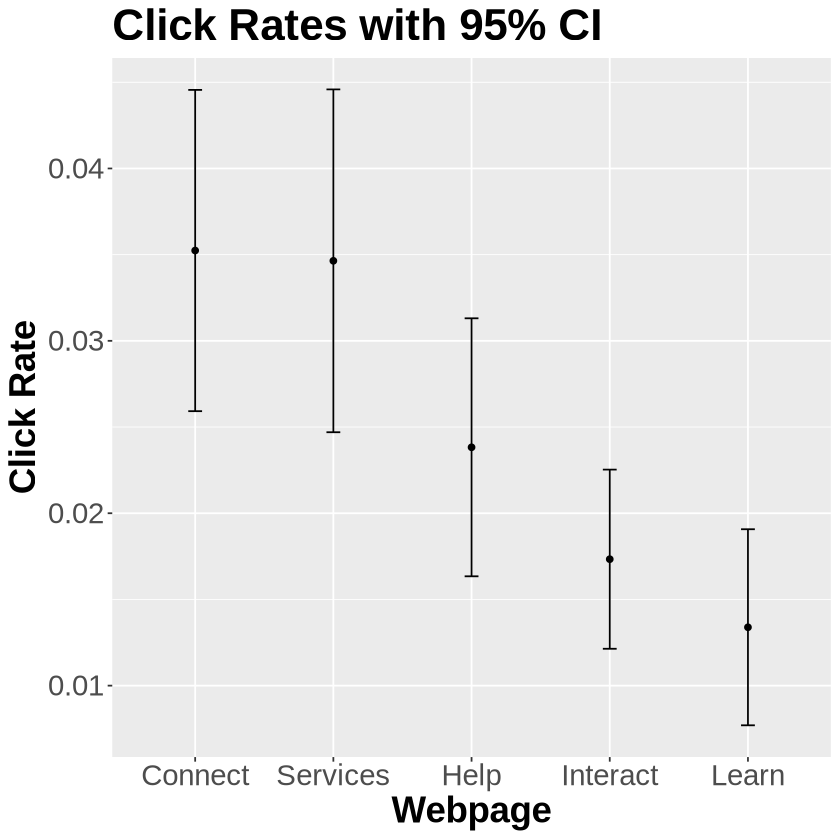

In [7]:
# Plotting click-through rates as points with 95% confidence intervals.
# CIs_click_through_rates <- 
#   click_through %>% 
#   ggplot(aes(..., ...)) +
#   ...() +
#   geom_errorbar(aes(ymin = ..., ymax = ...), width = 0.1) +
#   theme(
#     text = element_text(size = 22),
#     plot.title = element_text(face = "bold"),
#     axis.title = element_text(face = "bold")
#   ) +
#   ggtitle(...) +
#   xlab(...) +
#   ylab(...)

# your code here
CIs_click_through_rates <- 
  click_through %>% 
  ggplot(aes(webpage, click_rate)) +
  geom_point() +
  geom_errorbar(aes(ymin = lower_ci, ymax = upper_ci), width = 0.1) +
  theme(
    text = element_text(size = 22),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  ) +
  ggtitle("Click Rates with 95% CI") +
  xlab("Webpage") +
  ylab("Click Rate")

CIs_click_through_rates

In [8]:
test_1.2()

Test passed 🎊
Test passed 😸
Test passed 😸
Test passed 🎊
Test passed 😸
Test passed 🥇
Test passed 🌈
Test passed 🥇
[1] "Success!"


**Question 1.3**
<br>{points: 1}

Based on the findings in the plot `CIs_click_through_rates`, what can we statistically conclude from these confidence intervals?

**A.** We can see that treatment **Connect** has the largest click-through rate among the five treatments. It is statistically larger than the control treatment **Interact**.

**B.** We cannot state that treatment **Connect** is statistically larger than treatment **Services** since their confidence intervals overlap. However, we can state that these two treatments are statistically larger than the control treatment **Interact** and **Learn** given that their corresponding confidence intervals do not overlap.

*Assign your answer to an object called `answer1.3`. Your answer should be one of `"A"` or `"B"` surrounded by quotes.*

In [9]:
# answer1.3 <- 

# your code here
answer1.3 <- "B"

In [10]:
test_1.3()

Test passed 🎉
Test passed 😸
Test passed 🌈
[1] "Success!"


**Question 1.4**
<br>{points: 1}

Recall that the click-through rates by treatment are proportions that go from 0 to 1. We want to compare whether the rate of a given treatment is larger than the rate corresponding to another one. Suppose we rely on the Central Limit Theorem and assume that our sample sizes are large enough. What is the specific analysis we need to perform?

**A.** One-sample $z$-test. 

**B.** One-sample $t$-test.

**C.** Two-sample $z$-test.

**D.** Two-sample $t$-test.

**E.** Two-way ANOVA.

*Assign your answer to an object called `answer1.4`. Your answer should be one of `"A"`, `"B"`, `"C"`, `"D"`, or `"E"` surrounded by quotes.*

In [11]:
# answer1.4 <- 

# your code here
answer1.4 <- "C"

In [12]:
test_1.4()

Test passed 🎉
Test passed 😸
Test passed 🎊
[1] "Success!"


**Question 1.5**
<br>{points: 1}

Let $p_A$ and $p_B$ be the click-through rates of two given treatments **A** and **B**, respectively. Suppose you want to assess whether the click-through rate of treatment **A** is larger than the one corresponding to treatment **B**. What is the set of hypotheses we are testing in this case?

**A.** $H_0: p_A = p_B$ vs. $H_1: p_A > p_B$

**B.** $H_0: p_A > p_B$ vs. $H_1: p_A < p_B$

**C.** $H_0: p_A = p_B$ vs. $H_1: p_A \neq p_B$

**D.** $H_0: p_A = p_B$ vs. $H_1: p_A < p_B$

*Assign your answer to an object called `answer1.5`. Your answer should be one of `"A"`, `"B"`, `"C"`, or `"D"` surrounded by quotes.*

In [13]:
# answer1.5 <- 

# your code here
answer1.5 <- "A"

In [14]:
test_1.5()

Test passed 🌈
Test passed 😀
Test passed 😀
[1] "Success!"


**Question 1.6**
<br>{points: 1}

Perform pairwise frequentist hypothesis test analyses to assess statistically significant differences between all the experimental treatments. This will require control for multiple comparisons. You can use the Bonferroni correction along with the function `pairwise.prop.test()`. Create an object named `pairwise_comparisons`. 

> **Heads-up:** Given the answer in **Question 1.6**, rows in `pairwise_comparisons` will correspond to treatment **A** and columns to treatment **B**.

*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

In [15]:
# Assigning numbers of "successes" from data frame `click_through`
# successes <- click_through$...

# Assigning numbers of "trials" from data frame `click_through`
# trials <- click_through$...

# Putting labels on vector cells
# names(successes) <- click_through$webpage
# names(trials) <- click_through$webpage

# pairwise_comparisons <- pairwise.prop.test(x = ...,
#   n = ....,
#   p.adjust.method = ..., 
#   alternative = ...,
# )

# your code here

# Assigning numbers of "successes" from data frame `click_through`
successes <- click_through$target_clicks

# Assigning numbers of "trials" from data frame `click_through`
trials <- click_through$adjusted_clicks

# Putting labels on vector cells
names(successes) <- click_through$webpage
names(trials) <- click_through$webpage

pairwise_comparisons <- pairwise.prop.test(x = successes,
  n = trials,
  p.adjust.method = "bonferroni", 
  alternative = "two.sided",
)

pairwise_comparisons


	Pairwise comparisons using Pairwise comparison of proportions 

data:  successes out of trials 

         Interact Connect Learn  Help  
Connect  0.0057   -       -      -     
Learn    1.0000   0.0013  -      -     
Help     1.0000   0.7594  0.4144 -     
Services 0.0129   1.0000  0.0026 1.0000

P value adjustment method: bonferroni 

In [16]:
test_1.6()

Test passed 😸
Test passed 🎉
Test passed 🎊
Test passed 🌈
Test passed 🎉
[1] "Success!"


**Question 1.7**
<br>{points: 1}

Based on your results in **Question 1.6**, using $\alpha = 0.05$, indicate what experimental treatments have a significantly larger click-through rate than the control **Interact**.

**A.** Connect.

**B.** Learn.

**C.** Help.

**D.** Services.

*Assign your answers to the object `answer1.7`. Your answer has to be a single string indicating the correct treatment labels **in alphabetical order** and surrounded by quotes (e.g., `"ABCD"` indicates you are selecting the four options).*

In [17]:
# answer1.7 <- 

# your code here
answer1.7 <- "AD"

In [18]:
test_1.7()

Test passed 🥇
Test passed 🌈
Test passed 😸
[1] "Success! You've finished week 1!!"


**Question 1.8**
<br>{points: 1}

a) In one or two sentences, explain why a Bonferroni correction is needed to assess the significance of the pairwise the test performed in **Question 1.7**.

b) In one or two sentences, explain how to implement a Bonferroni correction in this case.

a) A Bonferroni correction is needed to assess the significance of the pairwise test because it controls the familywise error rate, which is the probability of making one or more false discoveries when performing multiple hypotheses tests.

b) To implement a Bonferroni correction in this case, I divide the desired significant level (e.g., 0.05) by the number of comparisons being made. For each individual test, I tried to compare its p-value against this adjusted Alpha to determine significance.